In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [428]:
df = pd.read_csv('../datasets/train_dataset.csv')

In [429]:
import pandas as pd
from sklearn.cluster import KMeans

pivot_table = pd.pivot_table(df, values='percentage_docks_available', index='station_id', columns='hour', aggfunc='mean')

pivot_table = pivot_table.reset_index()


n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pivot_table.iloc[:, 1:])  


cluster_labels = kmeans.labels_
station_ids = pivot_table['station_id']

station_cluster_mapping = dict(zip(station_ids, cluster_labels))

for station_id, cluster_label in station_cluster_mapping.items():
    print(f"Station ID: {station_id} - Cluster: {cluster_label}")


Station ID: 1 - Cluster: 2
Station ID: 2 - Cluster: 2
Station ID: 3 - Cluster: 2
Station ID: 4 - Cluster: 1
Station ID: 5 - Cluster: 2
Station ID: 6 - Cluster: 1
Station ID: 7 - Cluster: 1
Station ID: 8 - Cluster: 1
Station ID: 9 - Cluster: 1
Station ID: 11 - Cluster: 1
Station ID: 12 - Cluster: 1
Station ID: 13 - Cluster: 1
Station ID: 14 - Cluster: 1
Station ID: 15 - Cluster: 0
Station ID: 17 - Cluster: 1
Station ID: 18 - Cluster: 2
Station ID: 19 - Cluster: 2
Station ID: 20 - Cluster: 2
Station ID: 21 - Cluster: 2
Station ID: 22 - Cluster: 2
Station ID: 23 - Cluster: 1
Station ID: 24 - Cluster: 2
Station ID: 25 - Cluster: 0
Station ID: 26 - Cluster: 2
Station ID: 27 - Cluster: 0
Station ID: 29 - Cluster: 2
Station ID: 30 - Cluster: 2
Station ID: 31 - Cluster: 1
Station ID: 33 - Cluster: 1
Station ID: 34 - Cluster: 1
Station ID: 35 - Cluster: 1
Station ID: 36 - Cluster: 1
Station ID: 37 - Cluster: 1
Station ID: 39 - Cluster: 1
Station ID: 40 - Cluster: 1
Station ID: 41 - Cluster: 2
S

c:\Users\alber\Documents\Bike_availability_prediction\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


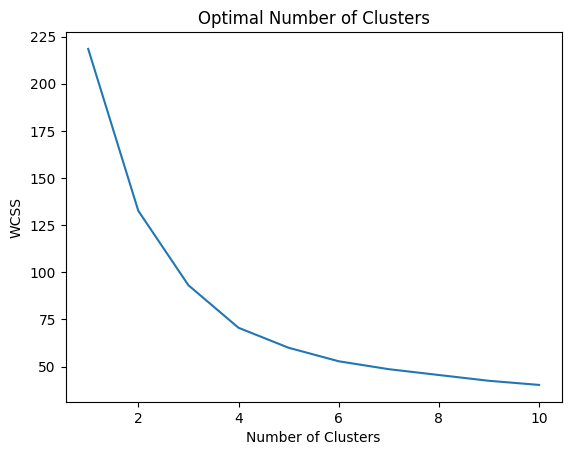

In [430]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your data in a pandas DataFrame called "data"
# with columns: station_id, hour_of_day, and target

# Pivot the data to get target values for each station_id and hour_of_day
pivot_table = pd.pivot_table(df, values='percentage_docks_available', index='station_id', columns='hour', aggfunc='mean')

# Reset the index
# pivot_table = pivot_table.reset_index()

# Calculate within-cluster sum of squares (WCSS) for different number of clusters
wcss = []
max_clusters = 10  # Maximum number of clusters to try
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init = 10)
    kmeans.fit(pivot_table)  # Exclude the station_id column from clustering
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters+1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Optimal Number of Clusters')
plt.show()


In [431]:
pivot_table = pd.pivot_table(df, values='percentage_docks_available', index='station_id', columns='hour', aggfunc='mean')

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init = 10)
kmeans.fit(pivot_table)  

pivot_table['cluster'] = kmeans.predict(pivot_table)
station_cluster_mapping = dict(zip(pivot_table.index.values, pivot_table.cluster.values))

for station_id, cluster_label in station_cluster_mapping.items():
    print(f"Station ID: {station_id} - Cluster: {cluster_label}")

Station ID: 1 - Cluster: 0
Station ID: 2 - Cluster: 0
Station ID: 3 - Cluster: 3
Station ID: 4 - Cluster: 3
Station ID: 5 - Cluster: 0
Station ID: 6 - Cluster: 0
Station ID: 7 - Cluster: 3
Station ID: 8 - Cluster: 3
Station ID: 9 - Cluster: 3
Station ID: 11 - Cluster: 1
Station ID: 12 - Cluster: 1
Station ID: 13 - Cluster: 1
Station ID: 14 - Cluster: 3
Station ID: 15 - Cluster: 2
Station ID: 17 - Cluster: 1
Station ID: 18 - Cluster: 0
Station ID: 19 - Cluster: 0
Station ID: 20 - Cluster: 0
Station ID: 21 - Cluster: 0
Station ID: 22 - Cluster: 0
Station ID: 23 - Cluster: 1
Station ID: 24 - Cluster: 0
Station ID: 25 - Cluster: 2
Station ID: 26 - Cluster: 4
Station ID: 27 - Cluster: 2
Station ID: 29 - Cluster: 0
Station ID: 30 - Cluster: 0
Station ID: 31 - Cluster: 1
Station ID: 33 - Cluster: 3
Station ID: 34 - Cluster: 3
Station ID: 35 - Cluster: 3
Station ID: 36 - Cluster: 3
Station ID: 37 - Cluster: 3
Station ID: 39 - Cluster: 3
Station ID: 40 - Cluster: 3
Station ID: 41 - Cluster: 4
S

In [432]:
from sklearn.base import BaseEstimator, TransformerMixin

class TargetCorrelationMapper(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_clusters):
        super().__init__()
        self.n_clusters = n_clusters

    def fit(self, X, y):
        data = X[['hour', 'station_id']].copy()
        data['percentage_docks_available'] = y.values

        pivot_table = pd.pivot_table(data, values='percentage_docks_available', index='station_id', columns='hour', aggfunc='mean')
        kmeans = KMeans(n_clusters = self.n_clusters, n_init = 10, random_state=42)
        kmeans.fit(pivot_table)
        pivot_table['cluster'] = kmeans.predict(pivot_table)
        self.station_cluster_mapping = dict(zip(pivot_table.index.values, pivot_table.cluster.values))
        return self
    
    def transform(self, X, y = None):
        X_ = X.copy()
        X_['cluster'] = X_.station_id.map(self.station_cluster_mapping)
        return X_
        

### Models training - Base XGBoost - just sequences

In [433]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [434]:
df = pd.read_csv('../datasets/train_dataset.csv')
sub = pd.read_csv('../datasets/sub_dataset.csv', index_col = 0)
sub = sub.sort_index()

In [435]:
df = df[df.status == 1]
assert df[(df.is_renting != 1) & (df.is_installed != 1)].shape[0] == 0

In [436]:
df = df[df.year != 2020]

In [437]:
COLS = [col for col in df.columns if 'ctx' in col]
TARGET = 'percentage_docks_available'
N_CLUSTERS = 6

In [438]:
X_train, X_val = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

In [439]:
y_train = X_train.pop(TARGET)
y_val = X_val.pop(TARGET)

In [440]:
tcm = TargetCorrelationMapper(n_clusters = N_CLUSTERS)

In [441]:
tcm.fit(X_train, y_train)
X_train = tcm.transform(X_train)
X_val = tcm.transform(X_val)

In [442]:
X_train.cluster.value_counts()

cluster
5    271219
3    262516
2    222127
0    152463
1    149343
4    125000
Name: count, dtype: int64

In [443]:
models = [XGBRegressor() for i in range(N_CLUSTERS)]

In [444]:
def index_from_cluster(df, cluster):
    return np.array(df[df.cluster == cluster].index)

In [445]:
from sklearn.metrics import mean_squared_error
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [446]:

val_errors = []
train_errors = []
dataframes = []
for cluster, model in enumerate(models):
    
    train_idx = index_from_cluster(X_train, cluster)
    val_idx = index_from_cluster(X_val, cluster)
    X_tr = X_train.loc[train_idx, COLS].copy()
    y_tr = y_train.loc[train_idx].copy()
    X_vl = X_val.loc[val_idx, COLS].copy()
    y_vl = y_val.loc[val_idx].copy()

    model.fit(X_tr, y_tr)
    val_preds = model.predict(X_vl)
    train_preds = model.predict(X_tr)
    
    train_error = RMSE(y_tr, train_preds)
    val_error = RMSE(y_vl, val_preds)
    val_errors.append(val_error)
    train_errors.append(train_error)

    X_tr['pred'] = train_preds
    X_vl['pred'] = val_preds
    X_tr[TARGET] = y_tr
    X_vl[TARGET] = y_vl

    dataframes.append((X_tr.copy(), X_vl.copy()))

    print(f"Model for cluster: {cluster}, training RMSE: {train_error}")
    print(f"Model for cluster: {cluster}, validation RMSE: {val_error}")
    print('-------------------------------------'*2)

print(f"Finished training. Average training error amongst all clusters: {np.mean(train_errors)}")
print(f"Finished training. Average validation error amongst all clusters: {np.mean(val_errors)}")


Model for cluster: 0, training RMSE: 0.11219690184942666
Model for cluster: 0, validation RMSE: 0.11974818723688752
--------------------------------------------------------------------------
Model for cluster: 1, training RMSE: 0.1138268178500041
Model for cluster: 1, validation RMSE: 0.12123491913040504
--------------------------------------------------------------------------
Model for cluster: 2, training RMSE: 0.08325226324854514
Model for cluster: 2, validation RMSE: 0.08769449505072144
--------------------------------------------------------------------------
Model for cluster: 3, training RMSE: 0.10791733935701832
Model for cluster: 3, validation RMSE: 0.11276492205517581
--------------------------------------------------------------------------
Model for cluster: 4, training RMSE: 0.1015704390658933
Model for cluster: 4, validation RMSE: 0.10941773100094365
--------------------------------------------------------------------------
Model for cluster: 5, training RMSE: 0.10100973

### Training final models

In [447]:
df.head(2)

,station_id,last_reported,num_bikes_available,is_installed,is_renting,status,month,day,hour,year,...,lat,lon,capacity,altitude,percentage_docks_available,temp,humidity,windspeed,precip,icon
733991,1,2021-01-01 04:00:00+01:00,41.0,1.0,1.0,1.0,1.0,1.0,4.0,2021.0,...,41.397978,2.180107,46.0,16.0,0.891304,41.4,83.38,5.3,0.0,partly-cloudy-night
733992,5,2021-01-01 04:00:00+01:00,8.0,1.0,1.0,1.0,1.0,1.0,4.0,2021.0,...,41.391103,2.180176,39.0,7.0,0.205128,41.4,83.38,5.3,0.0,partly-cloudy-night


In [448]:
y = df.pop(TARGET)

In [449]:
tcm = TargetCorrelationMapper(n_clusters = N_CLUSTERS)
tcm.fit(df, y)
X_train = tcm.transform(df)
X_test = tcm.transform(sub)

In [450]:
sample = pd.read_csv('../data/submission_data/sample_submission.csv')

In [451]:
models = [XGBRegressor() for i in range(N_CLUSTERS)]
df_predictions = pd.DataFrame(columns=['index', TARGET])

for cluster, model in enumerate(models):
    
    train_idx = index_from_cluster(X_train, cluster)
    test_idx = index_from_cluster(X_test, cluster)

    X_tr = df.loc[train_idx, COLS].copy()
    y_tr = y.loc[train_idx].copy()
    X_tst = X_test.loc[test_idx, COLS].copy()

    model.fit(X_tr, y_tr)

    preds = model.predict(X_tst)

    cluster_df = pd.DataFrame({'index': test_idx, TARGET: preds})
    df_predictions = pd.concat((df_predictions, cluster_df))


In [ ]:
df_ordered = df_predictions.sort_values(by = 'index')

In [ ]:
df_ordered.to_csv('./submissions/Clustered_xgboost20212022.csv', index = None)